In [1]:
1+1

2

In [190]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
#import keras
%matplotlib inline

In [192]:
filename='/depot/darkmatter/data/xenonnt/AmBe/_ambe_bottom_cw11d2m-yqoqgyttzr.npy'

In [193]:
df=pd.DataFrame(np.load(filename))

In [291]:
filename2='/depot/darkmatter/data/xenonnt/rn220/nt_sr0_rn220_runs_cmtv7_tag20220305.hdf'

In [292]:
df1=pd.read_hdf(filename2, "table")

In [296]:
df['log_cs2']=np.log10(df.cs2)
df1['log_cs2']=np.log10(df1.cs2)

In [378]:
bad=df1[(df1['cut_cs2_area_fraction_top'])
                &(df1['cut_daq_veto'])
                &(df1['cut_main_is_valid_triggering_peak'])
                &(df1['cut_interaction_exists'])
                &(df1['cut_run_boundaries'])
                &(df1['cut_s1_area_fraction_top'])
                &(df1['cut_s1_max_pmt'])
                &(df1['cut_s1_pattern_bottom'])
                &(df1['cut_s1_pattern_top'])
                &(df1['cut_s1_single_scatter'])
                &(df1['cut_s1_width'])
                &(df1['cut_s2_pattern'])
                &(df1['cut_s2_recon_pos_diff'])
                &(df1['cut_s2_single_scatter'])
       &(df1['e_ces']< 30)&(df1['e_ces']>0)]

In [379]:
# print(len(bad))
# bad=bad.dropna()
# print(len(bad))

In [380]:
# for i in df.keys():
#     print(i)

In [381]:
type(True)

bool

In [382]:
mask=((df['cut_cs2_area_fraction_top'])
                &(df['cut_daq_veto'])
                &(df['cut_main_is_valid_triggering_peak'])
                &(df['cut_interaction_exists'])
                &(df['cut_run_boundaries'])
                &(df['cut_s1_area_fraction_top'])
                &(df['cut_s1_max_pmt'])
                &(df['cut_s1_pattern_bottom'])
                &(df['cut_s1_pattern_top'])
                &(df['cut_s1_single_scatter'])
                &(df['cut_s1_width'])
                &(df['cut_s2_pattern'])
                &(df['cut_s2_recon_pos_diff'])
                &(df['cut_s2_single_scatter'])
              # &(df['cut_s2_width_wire_modeled_wimps'])
                &(df['cut_nv_tpc_coincidence_ambe']))
               #&(df['cut_fiducial_volume'])
               #&(df['cut_s2_naive_bayes'])
              # &(df['cut_s1_naive_bayes'])
good=df.loc[(df['e_ces']< 30)&(df['e_ces']>0)& mask]
#bad=df.loc[(df['e_ces']< 100)&(df['e_ces']>0)& (not mask.all())]
good.loc[:,'good']=np.ones(len(good),dtype=bool)
bad.loc[:,'good']=np.zeros(len(bad),dtype=bool)

/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/depot/darkmatter/etc/conda/env/anacondark/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [383]:
training=good[:len(good)//2].append(bad[:len(bad)//80], ignore_index=True)
testing=good[len(good)//2 : ].append(bad[len(bad)//80 :], ignore_index=True)

In [384]:
len(training)

662

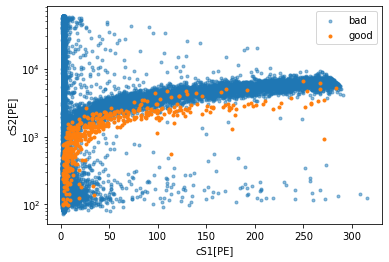

In [385]:
plt.scatter(bad.cs1,bad.cs2,marker='.',label='bad',alpha=0.5)
plt.scatter(good.cs1,good.cs2,marker='.',label='good',alpha=1)
plt.yscale('log')
plt.xlabel('cS1[PE]')
plt.ylabel('cS2[PE]')
plt.legend()

In [386]:
features=['cs1','log_cs2']#,'s1_max_pmt','s1_area_fraction_top','s2_range_50p_area','s1_range_50p_area']
X=training[features]
y=training['good']

X_t=testing[features]
y_t=testing['good']

# GridSVC

In [365]:
est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 50),
                'gamma': np.logspace(-3., 3., 50)})
est.fit(X, y)
print("Training Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

Training Score: 0.881


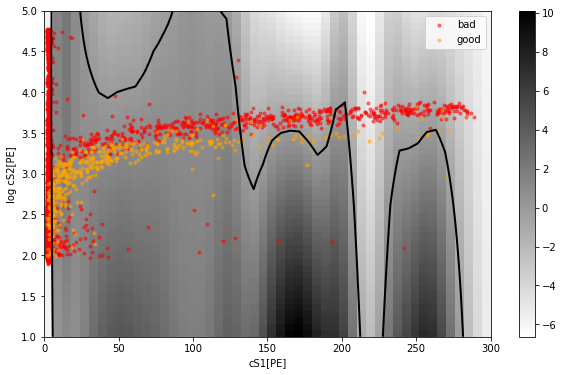

In [366]:

xx, yy = np.meshgrid(np.linspace(0,300,50),
                     np.linspace(1,5,50))

Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
Z = Z.reshape(xx.shape)
cmap = plt.cm.binary
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)
fig.colorbar(pos, ax=ax)

ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

plt.scatter(bad.cs1[:len(good)*10],bad.log_cs2[:len(good)*10],marker='.',label='bad',alpha=0.5,color='r')
plt.scatter(good.cs1,good.log_cs2,marker='.',label='good',alpha=0.5,color='orange')

plt.xlabel('cS1[PE]')
plt.ylabel('log cS2[PE]')
plt.legend()

In [341]:
# print("Test Score: {0:.3f}".format(
#       ms.cross_val_score(est, X_t[:1000], y_t[:1000]).mean()))

# NuSVC

In [387]:
# fit the model
clf = svm.NuSVC(gamma="auto",nu=0.5)
est1=clf.fit(X, y)

<ipython-input-388-b420dd935690>:19: UserWarning: No contour levels were found within the data range.
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")


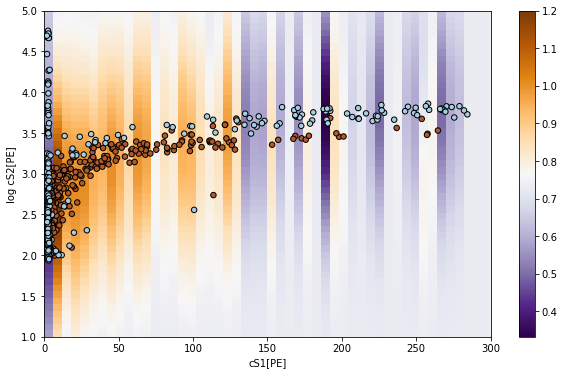

In [388]:

xx, yy = np.meshgrid(np.linspace(0,300,50),
                     np.linspace(1,5,50))



# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")

# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cS2[PE]')
#plt.axis([-3, 3, -3, 3])
plt.show()


In [355]:
(np.max(Z)+np.min(Z))/2

-0.22318288499158623

# Adaboost

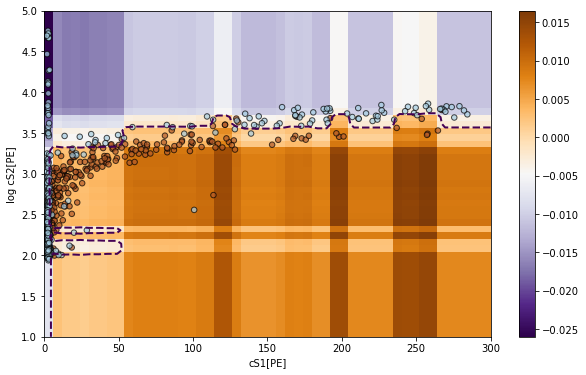

In [403]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


xx, yy = np.meshgrid(np.linspace(0,300,50),
                     np.linspace(1,5,50))

# Create and fit an AdaBoosted decision tree
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R", n_estimators=10000
)

ada.fit(X, y)

Z = bdt.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k",alpha=0.7)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cS2[PE]')
plt.show()


In [404]:
y_pred = ada.predict(X_t)

In [405]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_t, y_pred))

Accuracy: 0.9179515741337867


In [413]:
def compute_roc(y_true, y_pred, plot=False):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    auc_score = metrics.auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()

    return fpr, tpr,

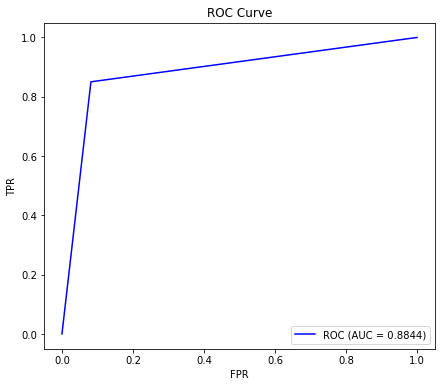

(array([0.        , 0.08158205, 1.        ]),
 array([0.        , 0.85042735, 1.        ]))

In [414]:
compute_roc(y_t, y_pred, plot=True)

## try depth=2

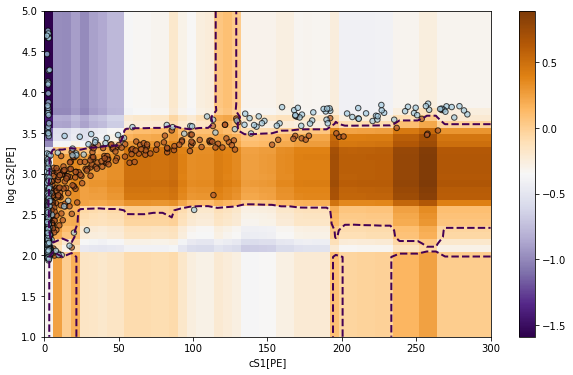

In [390]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


xx, yy = np.meshgrid(np.linspace(0,300,50),
                     np.linspace(1,5,50))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R", n_estimators=10000
)

bdt.fit(X, y)

Z = bdt.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k",alpha=0.7)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cS2[PE]')
plt.show()


## Let's overtrain..

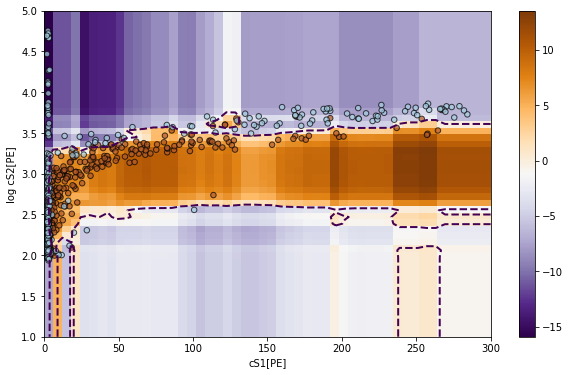

In [415]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


xx, yy = np.meshgrid(np.linspace(0,300,50),
                     np.linspace(1,5,50))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), algorithm="SAMME.R", n_estimators=10000
)

bdt.fit(X, y)

Z = bdt.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
pos=ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
fig.colorbar(pos,ax=ax)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X.cs1, X.log_cs2, s=30, c=y, cmap=plt.cm.Paired, edgecolors="k",alpha=0.7)
# plt.xticks(())
# plt.yticks(())
plt.xlabel('cS1[PE]')
plt.ylabel('log cS2[PE]')
plt.show()
